In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline
sns.set_style('whitegrid')

#stop the annoying SettingWithCopyWarnings
pd.options.mode.chained_assignment = None

In [2]:
#read all the files in the data_sources folder
#import the module glob
import glob

path = 'data_sources/'
all_files_list = glob.glob(path + "/*.csv")

airtraffic_year = dict()

for file in all_files_list:
    
    #extract the year from the filename; this will serve as the key of the airtraffic_year dictionary
    key = file[-8:-4]
    
    #read each file as a dataframe
    value = pd.read_csv(file)
    
    #change the column names for clarity
    value.columns = ['Region', 'Airport', 'Airline Operator', 'January', 'February', 'March', 'April', 
                    'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total']
    
    #force the change in numeric columns
    
    numeric_columns = [ 'January', 'February', 'March', 'April', 
                    'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total']
    
    for column in numeric_columns:
        
        value[column] = pd.to_numeric(value[column], errors = 'coerce')
    
    #assign the dataframe as the corresponding value of the key
    airtraffic_year[key] = value


In [3]:
#check the data
airtraffic_year['2001'].head()

,Region,Airport,Airline Operator,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,CAR,Baguio,Asian Spirit,60.0,NaN,NaN,58.0,42.0,32.0,NaN,NaN,NaN,NaN,NaN,52.0,244
1,CAR,Baguio,G. Aviation,NaN,NaN,NaN,148.0,54.0,46.0,NaN,NaN,NaN,NaN,NaN,218.0,466
2,CAR,Baguio,Military,22.0,NaN,NaN,76.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,76.0,194
3,I (Ilocos Norte),Laoag (International),PAL,28.0,50.0,52.0,52.0,50.0,48.0,52.0,52.0,50.0,52.0,52.0,NaN,538
4,I (Ilocos Norte),Laoag (International),Far East Trans,NaN,NaN,NaN,26.0,26.0,26.0,24.0,44.0,54.0,42.0,26.0,58.0,326


In [4]:
#create an empty dict 
airtraffic_NCR = dict()

for item in ['2001','2002','2003','2004','2005', '2006','2007','2008','2009','2010','2011' , '2012', '2013', '2014', '2015', '2016']:
    
    #extract the dataframe corresponding to the year
    airtraffic = airtraffic_year[item]
    
    #extract the rows for NCR
    airtraffic = airtraffic.loc[airtraffic['Region'] == 'NCR']
    
    #add a column named 'year' to identify that this selection came from that year
    airtraffic['Year'] = int(item)
    
    #reset the index
    airtraffic.reset_index(inplace = True, drop = True)
    
    #assign the year (as the key) and the selected dataframe as the value 
    airtraffic_NCR[item] = airtraffic
    

#combine the values into a single dataframe
airtraffic_allyears_NCR = pd.concat(airtraffic_NCR, ignore_index = True)


airtraffic_allyears_NCR.head()

,Region,Airport,Airline Operator,January,February,March,April,May,June,July,August,September,October,November,December,Total,Year
0,NCR,NAIA,International,3578.0,3150.0,3495.0,3539.0,3681.0,3457.0,3604.0,3561.0,3364.0,3409.0,3445.0,3816.0,42099.0,2001
1,NCR,NAIA,Domestic,6096.0,5386.0,6227.0,6782.0,7027.0,6269.0,6054.0,6177.0,5840.0,5917.0,5602.0,6096.0,73473.0,2001
2,NCR,NAIA,G. Aviation,4558.0,4204.0,5432.0,6251.0,5398.0,4174.0,4061.0,4067.0,4413.0,4648.0,4918.0,4895.0,57019.0,2001
3,NCR,NAIA,International,3711.0,3286.0,3706.0,3527.0,3712.0,3589.0,3833.0,3770.0,3626.0,3801.0,3683.0,3868.0,44112.0,2002
4,NCR,NAIA,Domestic,6065.0,5357.0,6101.0,6540.0,6571.0,5824.0,5732.0,5869.0,5524.0,6032.0,5678.0,5818.0,71111.0,2002


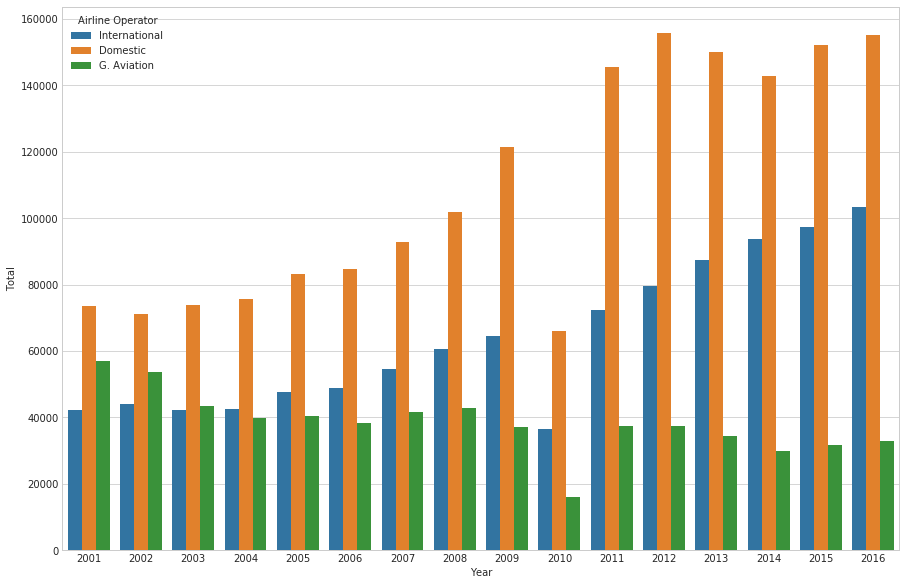

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax = sns.barplot(x= 'Year', y = 'Total', hue = 'Airline Operator', data = airtraffic_allyears_NCR)
plt.show()

In [6]:
groupedby_year = pd.DataFrame(airtraffic_allyears_NCR.groupby('Year')['Total'].sum())
groupedby_year.reset_index(inplace = True)
groupedby_year

,Year,Total
0,2001,172591.0
1,2002,168952.0
2,2003,159708.0
3,2004,158025.0
4,2005,171331.0
5,2006,171913.0
6,2007,188797.0
7,2008,205246.0
8,2009,222788.0
9,2010,118764.0


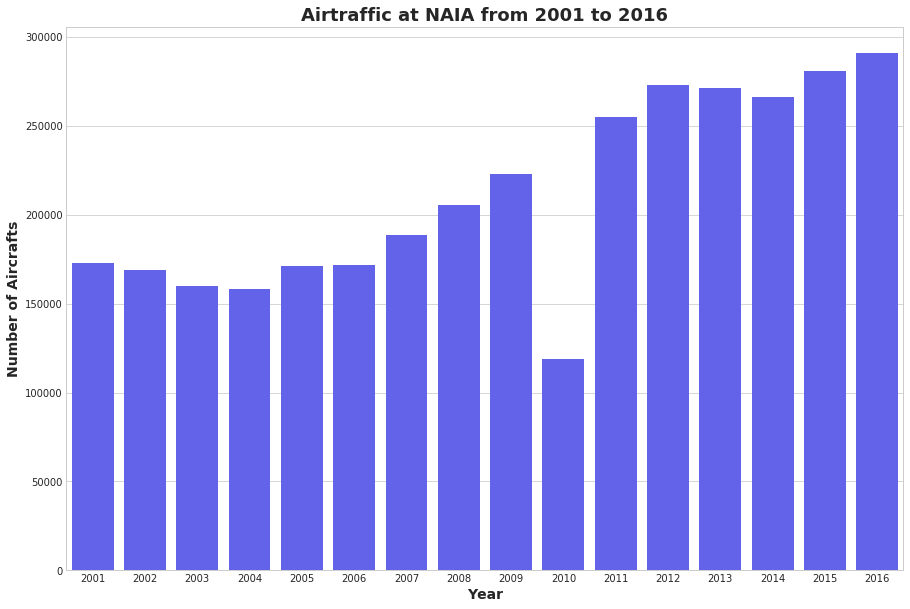

In [7]:
#plot the total number of airtraffic per year at NAIA
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax = sns.barplot(x= 'Year', y = 'Total',  data = groupedby_year, ci = None, color = '#4d4dff')


#add titles, axis labels, set the font size, weight, and family
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Number of Aircrafts', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Airtraffic at NAIA from 2001 to 2016', family = 'sans-serif', size = 18, 
          weight = 'bold')

#show the plot
plt.show()

In [8]:
airtraffic_allyears_NCR.head()




,Region,Airport,Airline Operator,January,February,March,April,May,June,July,August,September,October,November,December,Total,Year
0,NCR,NAIA,International,3578.0,3150.0,3495.0,3539.0,3681.0,3457.0,3604.0,3561.0,3364.0,3409.0,3445.0,3816.0,42099.0,2001
1,NCR,NAIA,Domestic,6096.0,5386.0,6227.0,6782.0,7027.0,6269.0,6054.0,6177.0,5840.0,5917.0,5602.0,6096.0,73473.0,2001
2,NCR,NAIA,G. Aviation,4558.0,4204.0,5432.0,6251.0,5398.0,4174.0,4061.0,4067.0,4413.0,4648.0,4918.0,4895.0,57019.0,2001
3,NCR,NAIA,International,3711.0,3286.0,3706.0,3527.0,3712.0,3589.0,3833.0,3770.0,3626.0,3801.0,3683.0,3868.0,44112.0,2002
4,NCR,NAIA,Domestic,6065.0,5357.0,6101.0,6540.0,6571.0,5824.0,5732.0,5869.0,5524.0,6032.0,5678.0,5818.0,71111.0,2002


In [9]:
pivoted = airtraffic_allyears_NCR.pivot(index='Year', columns = 'Airline Operator', values = 'Total')
pivoted.reset_index(inplace = True)
pivoted.head()

Airline Operator,Year,Domestic,G. Aviation,International
0,2001,73473.0,57019.0,42099.0
1,2002,71111.0,53729.0,44112.0
2,2003,73952.0,43456.0,42300.0
3,2004,75786.0,39854.0,42385.0
4,2005,83273.0,40312.0,47746.0


In [10]:
#obtain the relevant features for the stacked graph

domestic = pivoted['Domestic']
general_aviation = pivoted['G. Aviation']
international = pivoted['International']
year = pivoted['Year']

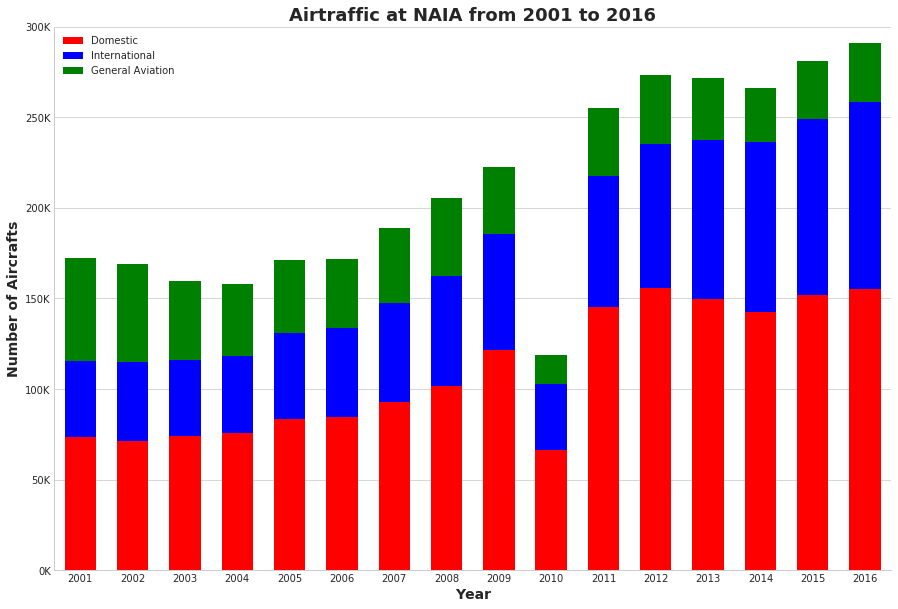

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#set the width of the bars
width = 0.6 

#plot each air traffic category individually, use different colors
ax1 = plt.bar(year, domestic, width, color='red', label = "Domestic")
ax2 = plt.bar(year, international, width, color='blue', bottom = domestic, label = "International")
ax3 = plt.bar(year, general_aviation, width, color = 'green', bottom = domestic + international, label = "General Aviation")

#set the axes labels and the plot title
plt.xlabel('Year', family = 'sans-serif', fontsize= 14, weight = 'bold')
plt.ylabel('Number of Aircrafts', family = 'sans-serif', fontsize = 14, weight = 'bold')
plt.title('Airtraffic at NAIA from 2001 to 2016', family = 'sans-serif', size = 18, 
          weight = 'bold')

#format the y-tick labels
def percent(x, pos):
    'The two args are the value and tick position'
    return '{}K'.format(int(x/1000))

formatter = FuncFormatter(percent)

ax.yaxis.set_major_formatter(formatter)

plt.yticks(family = 'sans-serif', fontsize = 10)
plt.xticks(year,family = 'sans-serif', fontsize = 10)

#set plot limits
plt.xlim(2000.5,2016.5)
plt.ylim(0,300000)

#show the plot legend
plt.legend()

#hide the vertical grids
ax.xaxis.grid(False)

#remove the top and the bottom spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()